In [38]:
import numpy as np
from numba import njit
import matplotlib.pyplot as plt

np.seterr(divide="ignore", invalid="ignore")

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
nan = np.nan
exp = np.exp
rand = np.random.rand
full = np.full
ln = np.log

# 4.8 Multivariate Metropolis

$$ 
S(x_1, ...,x_n) = 0.5∑_{i,j=1}^n A_{ij} x_i x_j \\ 
\tag{4.25}
(A_{ij}=A_{ji})
$$

$ n=2$ $x_1=x$ $x_2=y$ $A_{11}=A_{22}=1$ $A_{12}=0.5$

$$ S(x,y) = 0.5(x^2+y^2+xy) \tag{4.26} $$

In [29]:
@njit
def S(x, y):
    return 0.5 * (x**2 + y**2 + x * y)


@njit
def mcmc(S, K=10_000, step_x=0.5, step_y=0.5):
    # x[0]=y[0]=0
    x = full(K, 0.0)
    y = full(K, 0.0)

    accept = full(K, False)

    dx = (rand(K) - 0.5) * 2.0 * step_x
    dy = (rand(K) - 0.5) * 2.0 * step_y

    metro = rand(K)

    for k in range(1, K):
        init = S(x[k - 1], y[k - 1])

        # new (x, y)
        x[k] = x[k - 1] + dx[k]
        y[k] = y[k - 1] + dy[k]

        fin = S(x[k], y[k])

        accept[k] = exp(init - fin) > metro[k]

        x[k] = x[k] if accept[k] else x[k - 1]
        y[k] = y[k] if accept[k] else y[k - 1]

    return accept.sum() / K, (x, y)


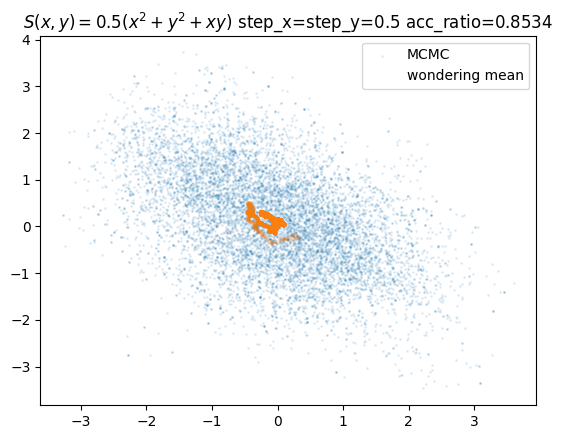

In [44]:
K = 10_000
acc_ratio, [x, y] = mcmc(S, K=K)

fig, ax = plt.subplots(1, 1)
ax.set(title=f"$ S(x,y) = 0.5(x^2+y^2+xy) $ step_x=step_y=0.5 {acc_ratio=}")

ax.scatter(x, y, alpha=0.1, s=1, label="MCMC")

# wandering mean
cum_mean_x = np.cumsum(x) / np.arange(K)
cum_mean_y = np.cumsum(y) / np.arange(K)
ax.scatter(
    cum_mean_x,
    cum_mean_y,
    s=5,
    label="wondering mean",
    alpha=np.arange(K) / K,
)

ax.legend();